
# Handwritten Text Recognition





> 1. Loading dataset
> 2. Loading data for training
> 3. Preprocessing
> 4. Choose Network
> 5. Results of choosen Network (Accuracy)
> 6. Curves and Losses Representation


Loading DataSet

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download crawford/emnist
! unzip emnist.zip -d dataset_mnist

Packages Required

In [ ]:
!pip install python-mnist
from mnist import MNIST
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D,MaxPool2D,Flatten
import matplotlib.pyplot as plt
from keras.models import model_from_json
import h5py


Loading Data for Training

In [ ]:
mnist = MNIST()
x_train,y_train = mnist.load('/content/dataset_mnist/emnist_source_files/emnist-byclass-train-images-idx3-ubyte',
                             '/content/dataset_mnist/emnist_source_files/emnist-byclass-train-labels-idx1-ubyte')
x_test, y_test = mnist.load('/content/dataset_mnist/emnist_source_files/emnist-byclass-test-images-idx3-ubyte',
                             '/content/dataset_mnist/emnist_source_files/emnist-byclass-test-labels-idx1-ubyte')

Preprocessing


*   Taking a chunk(around 50% of training data) to avoid RAM exceeding.
*   Converting data into numpy arrays.
*   Reshaping to convert into OneHot Encoding
*   Normalizing Data
*   Splitting test data into Test and Validation Data
      (50% test and 50% validation)



In [ ]:

x_train = np.array(x_train[:int(len(x_train)/2)])
y_train = np.array(y_train[:int(len(y_train)/2)])



x_test = np.array(x_test)
y_test = np.array(y_test)

# column vectors mein convert kr rhy hain
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)


ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

# ----------------------- normalisation---------
x_train = x_train/255.0
x_test = x_test/255.0

# --------------------- preprocessing-----------
x_test, x_validation, y_test, y_validation = train_test_split(x_test, y_test, test_size = 0.2)




# Artificial Nueral Network




In [ ]:



m_activation = tf.keras.activations.swish


model = Sequential()
model.add(Dense(784, input_dim=784, activation=m_activation))
model.add(Dense(256, activation=m_activation))
model.add(Dropout(0.25))
model.add(Dense(128, activation=m_activation))
model.add(Dropout(0.25))
model.add(Dense(62, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0001), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_validation, y_validation))

Evaluating Model

In [ ]:
# history1 = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_validation, y_validation))
model.evaluate(x_test, y_test)

2909/2909 [==============================] - 10s 3ms/step - loss: 0.4044 - accuracy: 0.8553


[0.40436652302742004, 0.8552945256233215]

Saving the Model

In [ ]:

def model_saving(model, name):
  model_json = model.to_json()
  with open(f"{name}.json", "w") as json_file:
      json_file.write(model_json)
  # serialize weights to HDF5
  model.save_weights(f"{name}.h5")
  print("Saved model to disk")
  

model_saving(model,"CNN_activation->_epoch=25_not_overfit")

from google.colab import files
files.download('CNN_activation->_epoch=25_not_overfit.h5')
files.download('CNN_activation->_epoch=25_not_overfit.json') 


# Convolution Neural Network

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28)
x_test = x_test.reshape(x_test.shape[0],28,28)
x_validation = x_validation.reshape(x_validation.shape[0],28,28)

print(x_train.shape)
print(x_test.shape)
print(x_validation.shape)



(348966, 28, 28)
(93058, 28, 28)
(23265, 28, 28)


In [ ]:
# convert data into 2d format to feed it to CNN

# x_train = x_train.reshape(x_train.shape[0],28,28)
# x_test = x_test.reshape(x_test.shape[0],28,28)
# x_validation = x_validation.reshape(x_validation.shape[0],28,28)

# print(x_train.shape)
# print(x_test.shape)
# print(x_validation.shape)


## humara kaam
# convolutional layer


# padding 'same' --> means padding will be performed so that the size remains the same as input
# stride (1,1) --> default ----> 1 Step
# ReLU --> Rectified Linear Function ==> 0 if X < 0 else return X
model2 = Sequential()
model2.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)))
# convolutional layer
model2.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
# 25% of neurons will be randomly drop-out
model2.add(Dropout(0.25))

model2.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.5))


# i tried adding another layer to this network, but no effect


# flatten output of conv
model2.add(Flatten())

# hidden layer
model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(250, activation='relu'))
model2.add(Dropout(0.3))
# output layer
model2.add(Dense(62, activation='softmax'))


epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8


# compiling the sequential model
# Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. 
# Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that 
# can handle sparse gradients on noisy problems.

from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model2.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer=sgd)

# training the model for 10 epochs



def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

from keras.callbacks import LearningRateScheduler
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = [lr_rate]
history2 = model2.fit(x_train, y_train, batch_size=32, epochs=epochs,callbacks=callbacks_list, validation_data=(x_validation, y_validation))
model.evaluate(x_test, y_test)

In [ ]:
np.random.seed(0)


[[8.40693861e-02 4.06086897e-08 4.99091390e-09 ... 1.06587665e-13
  2.61397859e-09 7.96937538e-09]
 [3.02828829e-09 2.48796317e-09 7.13987021e-08 ... 1.66835890e-09
  1.10217286e-06 8.08062861e-09]
 [5.37227685e-08 4.53699556e-07 1.95575929e-08 ... 2.59566280e-09
  5.28699751e-09 2.93525226e-09]
 ...
 [2.23390792e-10 1.57065375e-10 6.07212769e-09 ... 7.92306387e-10
  4.19300594e-10 2.43708573e-08]
 [6.36863112e-01 7.60071188e-08 5.10023916e-08 ... 2.26951964e-12
  9.94510252e-09 5.48164758e-09]
 [1.27653510e-03 5.52406091e-05 2.48010998e-04 ... 7.10648819e-05
  1.69722131e-04 4.89733601e-03]]
[24  9 28 ...  8  0 49]


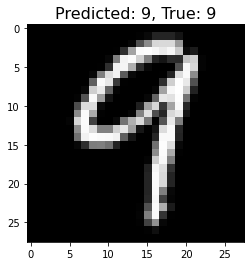

In [ ]:

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)



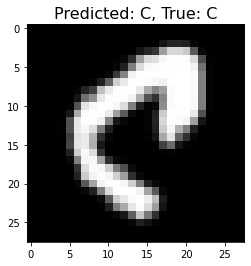

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(characters[y_sample_pred_class], characters[y_sample_true]), fontsize=16)
plt.imshow(np.transpose(x_sample.reshape(28, 28)), cmap='gray')

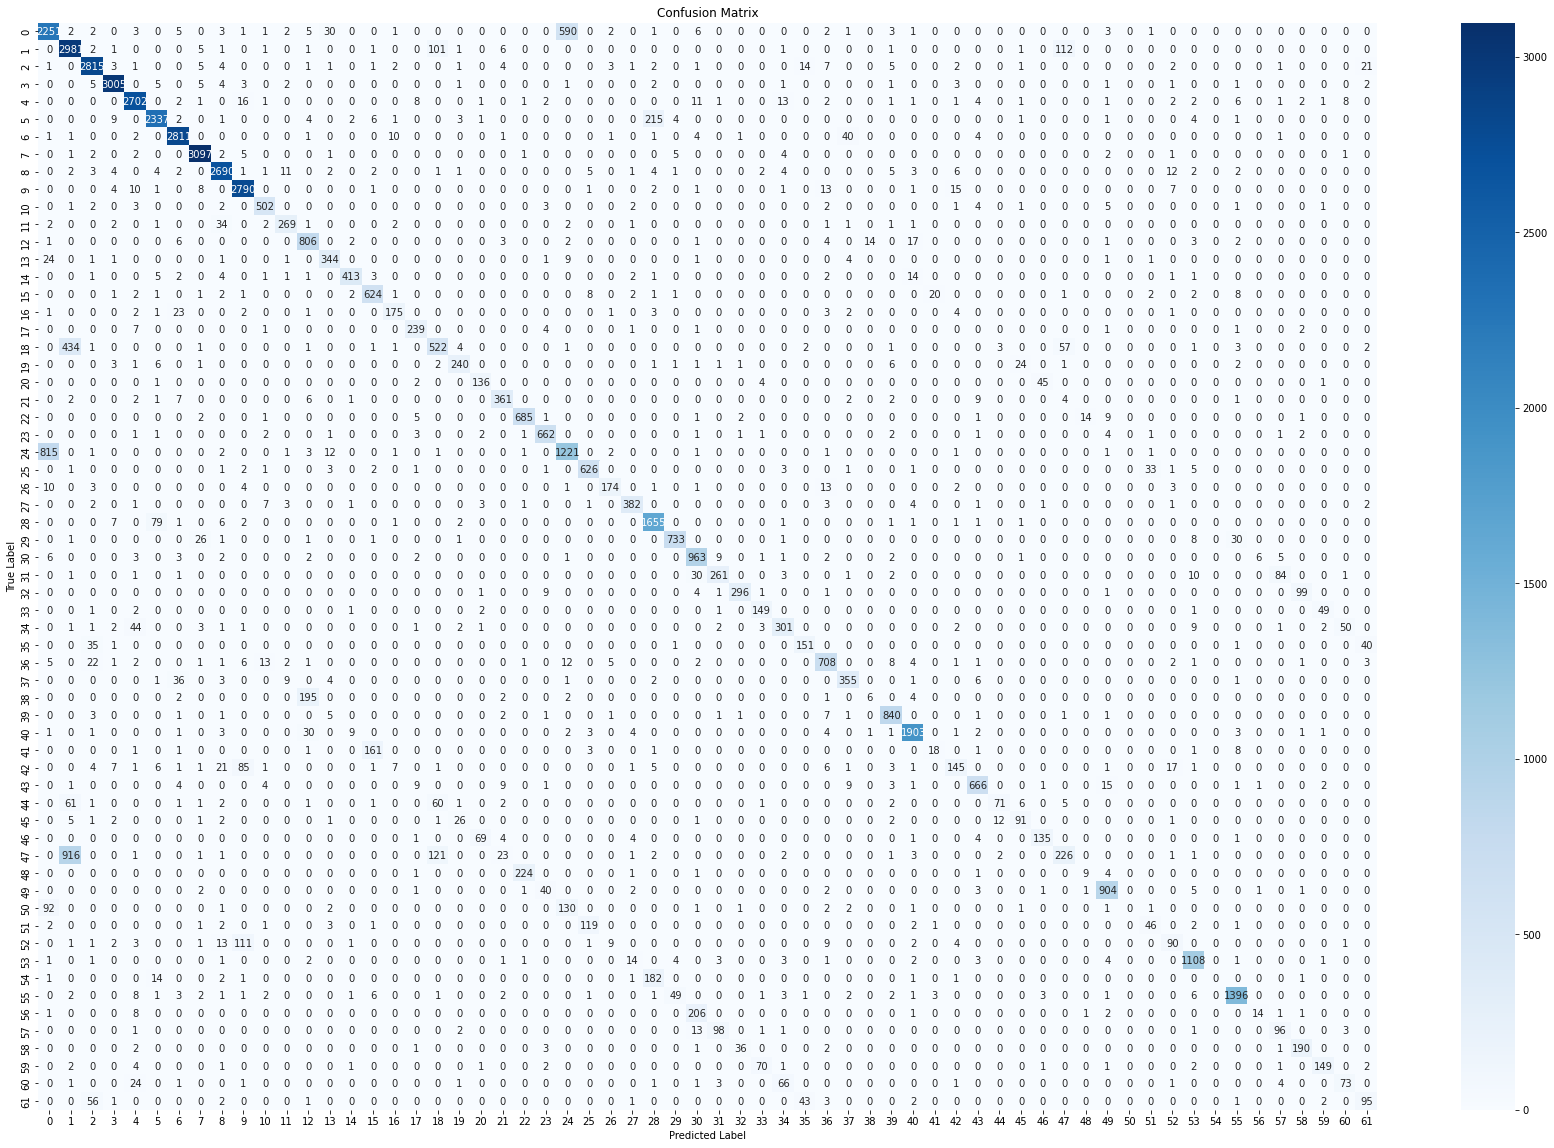

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot

fig, ax = plt.subplots(figsize=(30,20))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

In [ ]:
model_saving(model,"ANN_activation_relu_Epoch=30")

Saved model to disk


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['acc']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_acc']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [ ]:
plt.plot(history.history['loss'] + history.history['loss'])
plt.plot(history.history['val_loss'] + history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import math
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop = 10.0
  lrate = initial_lrate * math.pow(drop,  
          math.floor((1+epoch)/epochs_drop))
  return lrate
